## NCCF Simulation with only fin whales

In [4]:
# Add Code Directory (TEMPORY FIX)
import sys
sys.path.append('/home/jhrag/Code')

In [5]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
import pickle
from NI_simulation.modules import ni_sim
import scipy
%load_ext autoreload
%autoreload 2

## Single Fin Whale Source

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='Distance (m)', ylabel='Distance (m)'>)

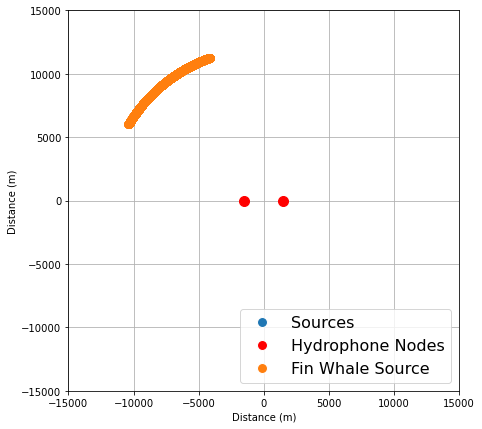

In [105]:
source_distribution = ni_sim.source_distribution2D()
sources = source_distribution.fin_whale_dist(12000,12000,20,10000,deg=130)
t_length = 60
env = ni_sim.environment(sources, time_length=t_length)
env.plot_env()

In [76]:
_,_ = env.get_signals()

Text(0.5, 1.0, 'NCCF')

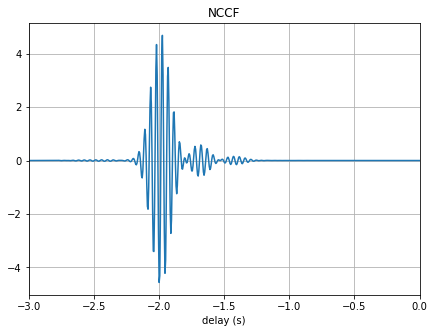

In [77]:
R, fi= env.correlate(plot=True)
plt.xlim([-3,0])
plt.title('NCCF')


Text(0, 0.5, 'Amplitude')

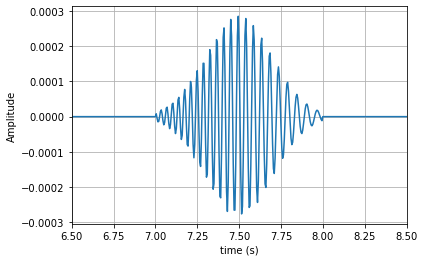

In [21]:
plt.plot(env.t, env.xA)
plt.xlim(6.5,8.5)
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Amplitude')

## Fin Whale Wav File

In [21]:
from scipy.io import wavfile

Fs, fin = wavfile.read('atlfin_128_64_0-50-FinWhaleAtlantic-10x.wav')

t = np.linspace(0, len(fin)/Fs, len(fin))

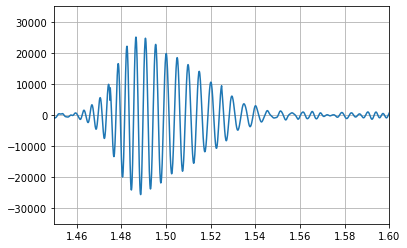

In [23]:
plt.plot(t, fin)
plt.xlim([1.45, 1.6])
plt.grid()

## Create Aninimation of Bearing

In [15]:
from tqdm import tqdm
import os

for k, bearing in enumerate(tqdm(np.linspace(180,0,180))):
    source_distribution = ni_sim.source_distribution2D()
    sources = source_distribution.fin_whale_dist(12000,12000,20,10000,deg=bearing)
    t_length = 60
    env = ni_sim.environment(sources, time_length=t_length)

    _,_ = env.get_signals()

    R, fig = env.correlate(plot=True)
    plt.xlim([-3,3])
    if k == 0:
        ylim = plt.gca().get_ylim()
    else:
        plt.ylim(ylim)
    plt.title(f'θ = {bearing}; ϕ = N/A')
    plt.grid()

    fig.savefig(f'animation_figures/{k:04}.png',dpi=400)
    plt.close()

print('Writing animation to file...')
im_name = 'Bearing_animation_constant_ylim.mp4'
os.system(f'ffmpeg -r 40 -f image2 -s 1920x1080 -i animation_figures/%04d.png -vcodec libx264 -crf 15 -pix_fmt yuv420p {im_name}')

100%|██████████| 180/180 [10:11<00:00,  3.40s/it]
Writing animation to file...


0

## Whales in signal, not in NCCF

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='Distance (m)', ylabel='Distance (m)'>)

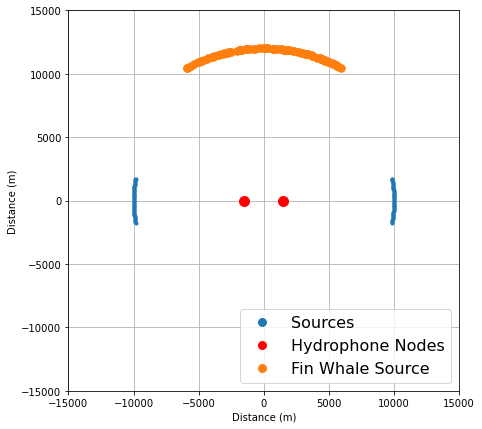

In [85]:
    source_distribution = ni_sim.source_distribution2D()
    sources = source_distribution.endfire_circle(10, 10000, 100)
    sources = source_distribution.fin_whale_dist(12000,12000,30,100,deg=90)
    t_length = 3600
    env = ni_sim.environment(sources, time_length=t_length)

    env.plot_env()

In [126]:
_ = env.get_signals()
R = env.correlate(plot=False)

Text(0.5, 1.0, 'NCCF')

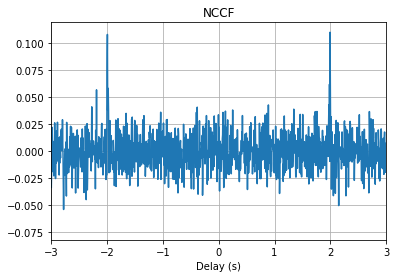

In [130]:
R_new = R+np.random.normal(0,0.015,len(R))
plt.plot(env.t_nccf, R_new)
#plt.plot(env.t_nccf, R)
plt.xlim([-3, 3])
plt.grid()
plt.xlabel('Delay (s)')
plt.title('NCCF')

Text(0.5, 1.0, 'PSD of NCCF')

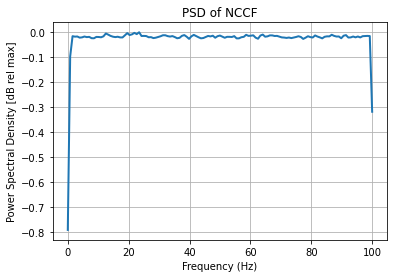

In [128]:
f, Pxx = signal.welch(R_new, fs=200)

plt.plot(f, np.log10(Pxx/np.max(Pxx)), linewidth=2)
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density [dB rel max]')
plt.title('PSD of NCCF')

Text(0.5, 1.0, 'PSD of Recieved Signal')

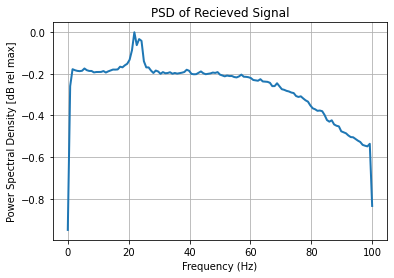

In [129]:
f, Pxx = signal.welch(env.xA, fs=200)

plt.plot(f, np.log10(Pxx/np.max(Pxx)), linewidth=2)
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density [dB rel max]')
plt.title('PSD of Recieved Signal')

Text(0.5, 0, 'time (s)')

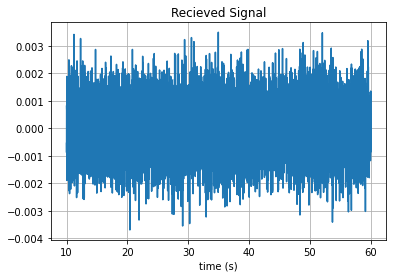

In [136]:
plt.plot(env.t[200*10:60*200], env.xA[200*10:60*200])
plt.grid()
plt.title('Recieved Signal')
plt.xlabel('time (s)')